Notebook modified from https://github.com/data-8/textbook

In [2]:
# from datascience import *
import numpy as np
import matplotlib
path_data = '../../../assets/data/'
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
pd.set_option('display.max_rows', 10)
import seaborn as sns

# Visualizing Numerical Distributions

Many of the variables that data scientists study are *quantitative* or *numerical*. Their values are numbers on which you can perform arithmetic. Examples that we have seen include the number of periods in chapters of a book (Ch. 1.3), the amount of money made by movies (Ch. 7), and the age of people in the United States (Ch. 6.3).

The values of a categorical variable can be given numerical codes, but that doesn't make the variable quantitative. In the example in which we studied Census data broken down by age group, the categorial variable `SEX` had the numerical codes `1` for 'Male,' `2` for 'Female,' and `0` for the aggregate of both groups `1` and `2`. While 0, 1, and 2 are numbers, in this context it doesn't make sense to subtract 1 from 2, or take the average of 0, 1, and 2, or perform other arithmetic on the three values. `SEX` is a categorical variable even though the values have been given a numerical code.

For our main example, we will return to a dataset that we studied when we were visualizing categorical data. It is the table `top`, which consists of data from U.S.A.'s top grossing movies of all time. For convenience, here is the description of the table again.

The first column contains the title of the movie. The second column contains the name of the studio that produced the movie. The third contains the domestic box office gross in dollars, and the fourth contains the  gross amount that would have been earned from ticket sales at 2016 prices. The fifth contains the release year of the movie. 

There are 200 movies on the list. Here are the top ten according to the unadjusted gross receipts in the column `Gross`.

In [3]:
top = pd.read_csv(path_data + 'top_movies.csv')
top

,Title,Studio,Gross,Gross (Adjusted),Year
0,Star Wars: The Force Awakens,Buena Vista (Disney),906723418,906723400,2015
1,Avatar,Fox,760507625,846120800,2009
2,Titanic,Paramount,658672302,1178627900,1997
3,Jurassic World,Universal,652270625,687728000,2015
4,Marvel's The Avengers,Buena Vista (Disney),623357910,668866600,2012
...,...,...,...,...,...
195,The Caine Mutiny,Columbia,21750000,386173500,1954
196,The Bells of St. Mary's,RKO,21333333,545882400,1945
197,Duel in the Sun,Selz.,20408163,443877500,1946
198,Sergeant York,Warner Bros.,16361885,418671800,1941


## Visualizing the Distribution of the Adjusted Receipts

In this section we will draw graphs of the distribution of the numerical variable in the column `Gross (Adjusted)`. For simplicity, let's create a smaller table that has the information that we need. And since three-digit numbers are easier to work with than nine-digit numbers, let's measure the `Adjusted Gross` receipts in millions of dollars. Note how `round` is used to retain only two decimal places.

In [4]:
millions = pd.DataFrame(top['Title'])
millions['Adjusted Gross'] = top['Gross (Adjusted)'] / 1000000
millions

,Title,Adjusted Gross
0,Star Wars: The Force Awakens,906.7234
1,Avatar,846.1208
2,Titanic,1178.6279
3,Jurassic World,687.7280
4,Marvel's The Avengers,668.8666
...,...,...
195,The Caine Mutiny,386.1735
196,The Bells of St. Mary's,545.8824
197,Duel in the Sun,443.8775
198,Sergeant York,418.6718


## A Histogram
A *histogram* of a numerical dataset looks very much like a bar chart, though it has some important differences that we will examine in this section. First, let's just draw a histogram of the adjusted receipts.

The `hist` method generates a histogram of the values in a column. The optional `unit` argument is used in the labels on the two axes. The histogram shows the distribution of the adjusted gross amounts, in millions of 2016 dollars. 

Text(0, 0.5, 'Percent per Million Dollars')

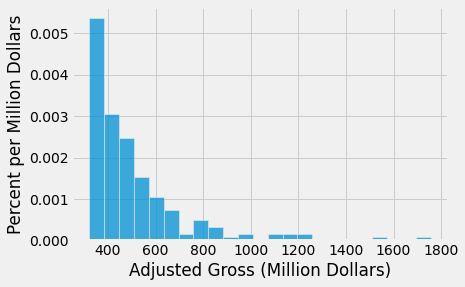

In [5]:
sns.histplot(data=millions, x='Adjusted Gross', stat='density')
plt.xlabel('Adjusted Gross (Million Dollars)')
plt.ylabel('Percent per Million Dollars')

## The Horizontal Axis

The amounts have been grouped into contiguous intervals called *bins*. Although in this dataset no movie grossed an amount that is exactly on the edge between two bins, `hist` does have to account for situations where there might have been values at the edges. So `hist` has an *endpoint convention*: bins include the data at their left endpoint, but not the data at their right endpoint. 

We will use the notation [*a*, *b*) for the bin that starts at *a* and ends at *b* but doesn't include *b*.

Sometimes, adjustments have to be made in the first or last bin, to ensure that the smallest and largest values of the variable are included. You saw an example of such an adjustment in the Census data studied earlier, where an age of "100" years actually meant "100 years old or older."

We can see that there are 10 bins (some bars are so low that they are hard to see), and that they all have the same width. We can also see that none of the movies grossed fewer than 300 million dollars; that is because we are considering only the top grossing movies of all time. 

It is a little harder to see exactly where the ends of the bins are situated. For example, it is not easy to pinpoint exactly where the value 500 lies on the horizontal axis. So it is hard to judge exactly where one bar ends and the next begins.

The optional argument `bins` can be used with `hist` to specify the endpoints of the bins. It must consist of a sequence of numbers that starts with the left end of the first bin and ends with the right end of the last bin. We will start by setting the numbers in `bins` to be 300, 400, 500, and so on, ending with 2000.  

Text(0, 0.5, 'Percent per Million Dollars')

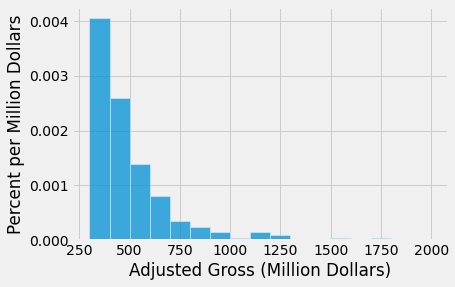

In [13]:
sns.histplot(data=millions, x='Adjusted Gross', stat='density', bins=np.arange(300,2001,100))

plt.xlabel('Adjusted Gross (Million Dollars)')
plt.ylabel('Percent per Million Dollars')

The horizontal axis of this figure is easier to read. The labels 200, 400, 600, and so on are centered at the corresponding values. The tallest bar is for movies that grossed between 300 million and 400 million dollars. 

A very small number of movies grossed 800 million dollars or more. This results in the figure being "skewed to the right," or, less formally, having "a long right hand tail." Distributions of variables like income or rent in large populations also often have this kind of shape.

## The Counts in the Bins

The counts of values in the bins can be computed from a table using `np.histogram`, which takes a column label or index and an optional sequence or number of bins and returns two arrays. The second array lists the left endpoints of the bins (but see the note about the final value, below).  The first array contains the counts of all values in the `Adjusted Gross` column that are in the corresponding bin. That is, it counts all the `Adjusted Gross` values that are greater than or equal to the value in `bin`, but less than the next value in `bin`. 

In [24]:
count, bins = np.histogram(millions['Adjusted Gross'], bins=np.arange(300, 2001, 100))
count, bins

(array([81, 52, 28, 16,  7,  5,  3,  1,  3,  2,  0,  0,  1,  0,  1,  0,  0]),
 array([ 300,  400,  500,  600,  700,  800,  900, 1000, 1100, 1200, 1300,
        1400, 1500, 1600, 1700, 1800, 1900, 2000]))

Let's put the counts into a table to see them better.

In [26]:
counts = pd.DataFrame({"bins": bins[:-1], "Count": count})
counts

,bins,Count
0,300,81
1,400,52
2,500,28
3,600,16
4,700,7
...,...,...
12,1500,1
13,1600,0
14,1700,1
15,1800,0


Notice the `bin` value 2000 in the last row. That's not the left end-point of any bar – it's the right end point of the last bar. By the endpoint convention, the data there are not included. So the corresponding `count` is recorded as 0, and would have been recorded as 0 even if there had been movies that made more than \$2,000$ million dollars. When either `sns.histplot` or `np.histogram` is called with a `bins` argument, the graph only considers values that are in the specified bins.

## The Vertical Axis: Density Scale

The horizontal axis of a histogram is straightforward to read, once we have taken care of details like the ends of the bins. The features of the vertical axis require a little more attention. We will go over them one by one.

Let's start by examining how to calculate the numbers on the vertical axis. If the calculation seems a little strange, have patience – the rest of the section will explain the reasoning.

**Calculation.** The height of each bar is the percent of elements that fall into the corresponding bin, relative to the width of the bin. 

In [27]:
counts['Percent'] = counts['Count'] / 200 * 100
counts['Height'] = counts['Percent'] / 100
counts

,bins,Count,Percent,Height
0,300,81,40.5,0.405
1,400,52,26.0,0.260
2,500,28,14.0,0.140
3,600,16,8.0,0.080
4,700,7,3.5,0.035
...,...,...,...,...
12,1500,1,0.5,0.005
13,1600,0,0.0,0.000
14,1700,1,0.5,0.005
15,1800,0,0.0,0.000


Go over the numbers on the vertical axis of the histogram above to check that the column `Heights` looks correct.

The calculations will become clear if we just examine the first row of the table. 

Remember that there are 200 movies in the dataset. The [300, 400) bin contains 81 movies. That's 40.5% of all the movies:

$$
\mbox{Percent} = \frac{81}{200} \cdot 100 = 40.5
$$

The width of the [300, 400) bin is $400 - 300 = 100$. So

$$
\mbox{Height} = \frac{40.5}{100} = 0.405
$$

The code for calculating the heights used the facts that there are 200 movies in all and that the width of each bin is 100.

**Units.** The height of the bar is 40.5% divided by 100 million dollars, and so the height is 0.405% per million dollars. 

This method of drawing histograms creates a vertical axis that is said to be *on the density scale*. The height of bar is **not** the percent of entries in the bin; it is the percent of entries in the bin relative to the amount of space in the bin. That is why the height measures crowdedness or *density*.

Let's see why this matters.

## Unequal Bins
An advantage of the histogram over a bar chart is that a histogram can contain bins of unequal width. Below, the values in the `Millions` column are binned into three uneven categories.

Text(0, 0.5, 'Percent per Million Dollars')

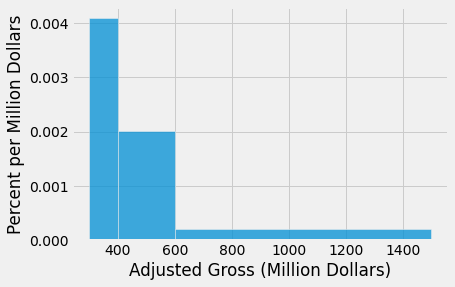

In [31]:
uneven = np.array([300, 400, 600, 1500])
sns.histplot(data=millions, x='Adjusted Gross', bins=uneven, stat='density')
plt.xlabel('Adjusted Gross (Million Dollars)')
plt.ylabel('Percent per Million Dollars')

Here are the counts in the three bins.

In [35]:
count, bins = np.histogram(millions['Adjusted Gross'], bins=uneven)
# print it as a dataframe
pd.DataFrame({"bins": bins[:-1], "Adjusted Gross counts": count})

,bins,Adjusted Gross counts
0,300,81
1,400,80
2,600,37


Although the ranges [300, 400) and [400, 600) have nearly identical counts, the bar over the former is twice as tall as the latter because it is only half as wide. The density of values in the [300, 400) is twice as much as the density in [400, 600). 

Histograms help us visualize where on the number line the data are most concentrated, especially when the bins are uneven.

## The Problem with Simply Plotting Counts
It is possible to display counts directly in a chart, using the `stat=count` option of `sns.histplot`. The resulting chart has the same shape as a histogram when the bins all have equal widths, though the numbers on the vertical axis are different.

<AxesSubplot:xlabel='Adjusted Gross', ylabel='Count'>

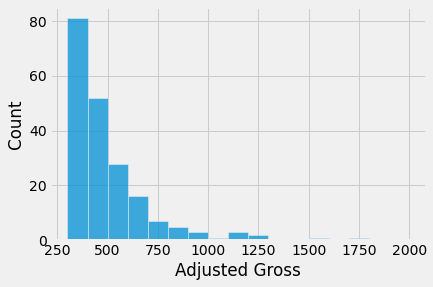

In [37]:
sns.histplot(data=millions, x='Adjusted Gross', bins=np.arange(300,2001,100), stat='count')

While the count scale is perhaps more natural to interpret than the density scale, the chart becomes highly misleading when bins have different widths. Below, it appears (due to the count scale) that high-grossing movies are quite common, when in fact we have seen that they are relatively rare.

<AxesSubplot:xlabel='Adjusted Gross', ylabel='Count'>

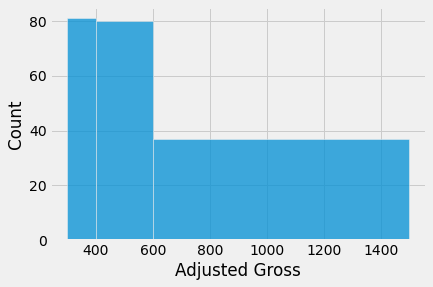

In [39]:
sns.histplot(data=millions, x='Adjusted Gross', bins=uneven, stat='count')

Even though the method used is called `hist`, **the figure above is NOT A HISTOGRAM.** It misleadingly exaggerates the proportion of movies grossing at least 600 million dollars. The height of each bar is simply plotted at the number of movies in the bin, *without accounting for the difference in the widths of the bins*. 

The picture becomes even more absurd if the last two bins are combined.

<AxesSubplot:xlabel='Adjusted Gross', ylabel='Count'>

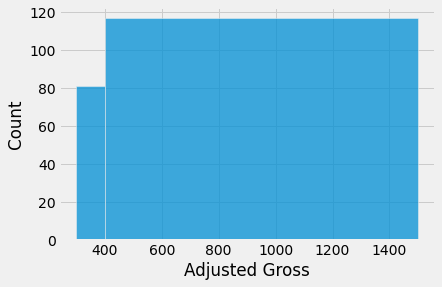

In [42]:
very_uneven = np.array([300, 400, 1500])
sns.histplot(data=millions, x='Adjusted Gross', bins=very_uneven, stat='count')

In this count-based figure, the shape of the distribution of movies is lost entirely.

## The Histogram: General Principles and Calculation

The figure above shows that what the eye perceives as "big" is area, not just height. This observation becomes particularly important when the bins have different widths.

That is why a histogram has two defining properties:

1. The bins are drawn to scale and are contiguous (though some might be empty), because the values on the horizontal axis are numerical.
2. The **area** of each bar is proportional to the number of entries in the bin. 

Property 2 is the key to drawing a histogram, and is usually achieved as follows:

$$
\mbox{area of bar} ~=~ \mbox{percent of entries in bin}
$$

The calculation of the heights just uses the fact that the bar is a rectangle:

$$
\mbox{area of bar} = \mbox{height of bar} \times \mbox{width of bin}
$$

and so

$$
\mbox{height of bar} ~=~ 
\frac{\mbox{area of bar}}{\mbox{width of bin}} ~=~
\frac{\mbox{percent of entries in bin}}{\mbox{width of bin}}
$$

The units of height are "percent per unit on the horizontal axis."

When drawn using this method, the histogram is said to be drawn on the density scale. On this scale:
- The area of each bar is equal to the percent of data values that are in the corresponding bin.
- The total area of all the bars in the histogram is 100%. Speaking in terms of proportions, we say that the areas of all the bars in a histogram "sum to 1".

## Flat Tops and the Level of Detail

Even though the density scale correctly represents percents using area, some detail is lost by grouping values into bins.

Take another look at the [300, 400) bin in the figure below. The flat top of the bar, at the level 0.405% per million dollars, hides the fact that the movies are somewhat unevenly distributed across that bin. 

Text(0, 0.5, 'Percent per Million Dollars')

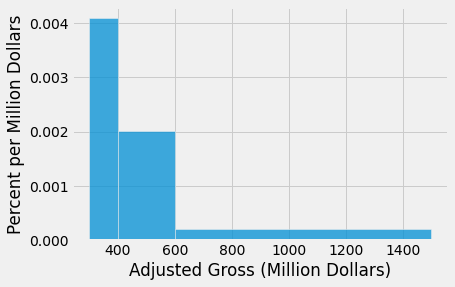

In [44]:
sns.histplot(data=millions, x='Adjusted Gross', bins=uneven, stat='density')
plt.xlabel('Adjusted Gross (Million Dollars)')
plt.ylabel('Percent per Million Dollars')

To see this, let us split the [300, 400) bin into 10 narrower bins, each of width 10 million dollars.

Text(0, 0.5, 'Percent per Million Dollars')

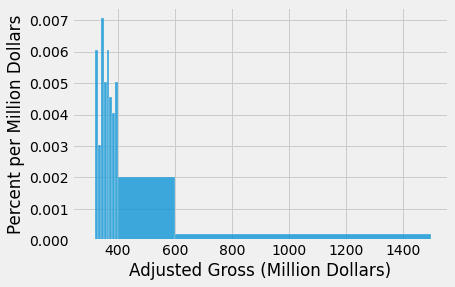

In [46]:
some_tiny_bins = np.array([300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 600, 1500])

sns.histplot(data=millions, x='Adjusted Gross', bins=some_tiny_bins, stat='density')
plt.xlabel('Adjusted Gross (Million Dollars)')
plt.ylabel('Percent per Million Dollars')

Some of the skinny bars are taller than 0.405 and others are shorter; the first two have heights of 0 because there are no data between 300 and 320. By putting a flat top at the level 0.405 across the whole bin, we are deciding to ignore the finer detail and are using the flat level as a rough approximation. Often, though not always, this is sufficient for understanding the general shape of the distribution.

**The height as a rough approximation.**
This observation gives us a different way of thinking about the height.
Look again at the [300, 400) bin in the earlier histograms. As we have seen, the bin is 100 million dollars wide and contains 40.5% of the data. Therefore the height of the corresponding bar is 0.405% per million dollars.

Now think of the bin as consisting of 100 narrow bins that are each 1 million dollars wide. The bar's height of "0.405% per million dollars" means that as a rough approximation, 0.405% of the movies are in each of those 100 skinny bins of width 1 million dollars.

Notice that because we have the entire dataset that is being used to draw the histograms, we can draw the histograms to as fine a level of detail as the data and our patience will allow. However, if you are looking at a histogram in a book or on a website, and you don't have access to the underlying dataset, then it becomes important to have a clear understanding of the "rough approximation" created by the flat tops.

## Histograms Q&A
Let's draw the histogram again, this time with four bins, and check our understanding of the concepts.

Text(0, 0.5, 'Percent per Million Dollars')

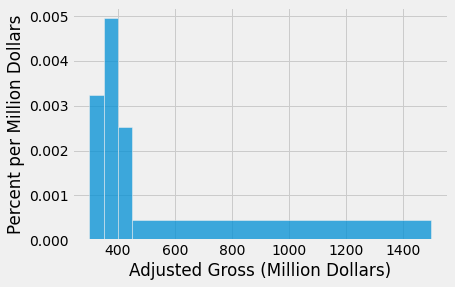

In [48]:
uneven_again = np.array([300, 350, 400, 450, 1500])

sns.histplot(data=millions, x='Adjusted Gross', bins=uneven_again, stat='density')
plt.xlabel('Adjusted Gross (Million Dollars)')
plt.ylabel('Percent per Million Dollars')

In [49]:
count, bins = np.histogram(millions['Adjusted Gross'], bins=uneven_again)
pd.DataFrame({"bins": bins[:-1], "Count": count})

,bins,Count
0,300,32
1,350,49
2,400,25
3,450,92


Look again at the histogram, and compare the [400, 450) bin with the [450, 1500) bin.

**Q**: Which has more movies in it? 

**A**: The [450, 1500) bin. It has 92 movies, compared with 25 movies in the [400, 450) bin.

**Q**: Then why is the [450, 1500) bar so much shorter than the [400, 450) bar?

**A**: Because height represents density per unit of space in the bin, not the number of movies in the bin. The [450, 1500) bin does have more movies than the [400, 450) bin, but it is also a whole lot wider. So it is less crowded. The density of movies in it is much lower.

## Differences Between Bar Charts and Histograms 

- Bar charts display one quantity per category. They are often used to display the distributions of categorical variables. Histograms display the distributions of quantitative variables. 
- All the bars in a bar chart have the same width, and there is an equal amount of space between consecutive bars. The bars of a histogram can have different widths, and they are contiguous.
- The lengths (or heights, if the bars are drawn vertically) of the bars in a bar chart are proportional to the value for each category. The heights of bars in a histogram measure densities; the *areas* of bars in a histogram are proportional to the numbers of entries in the bins.